# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

This Jupyter notebook contains the code pipeline for a traffic sign classifier tuned for project 2 of Term 1.
Python libraries used in this project:

- `pickle`: save and load binary python objects
- `numpy`: algebra calculations
- `matplotlib`: plots and image loading
- `tensorflow`: machine learning framework
- `sklearn`: machine learning framework

Packages `scikit-image` and `cv2` were tested, but not used in final form.

---
## Step 0: Load The Data

Input data was provided in binary files.

In [1]:
# Load pickled data
import pickle
import numpy as np

training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train0, y_train0 = train['features'], train['labels']
X_valid0, y_valid0 = valid['features'], valid['labels']
X_test0, y_test0 = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.



### Basic Summary of the Data Set Using Python and Numpy

In [2]:

# Number of training examples
n_train = X_train0.shape[0]

# Number of validation examples
n_validation = X_valid0.shape[0]

# Number of testing examples.
n_test = X_test0.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train0.shape[1], X_train0.shape[2], X_train0.shape[3]

# How many unique classes/labels there are in the dataset.
n_classes = np.max(np.unique(y_train0).shape)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("labels shape: ", y_train0.shape)
print(y_train0[0:4])

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
labels shape:  (34799,)
[41 41 41 41]


### Visualization of the dataset

Next, it is presented 4 random images from the training dataset and a histogram of labels (output).

7716 6524 33990 104


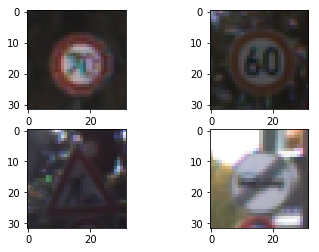

(array([  180.,  1980.,  2010.,  1260.,  1770.,  1650.,   360.,  1290.,
         1260.,  1320.,  1800.,  1170.,  1890.,  1920.,   690.,   540.,
          360.,   990.,  1080.,   180.,   300.,   270.,   330.,   450.,
          240.,  1350.,   540.,   210.,   480.,   240.,   390.,   690.,
          210.,   599.,   360.,  1080.,   330.,   180.,  1860.,   270.,
          300.,   210.,   210.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

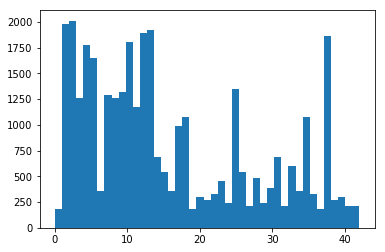

In [3]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Visualizations will be shown in the notebook.
%matplotlib inline

im1 = np.round(np.random.random_sample()*n_train).astype(int)
im2 = np.round(np.random.random_sample()*n_train).astype(int)
im3 = np.round(np.random.random_sample()*n_train).astype(int)
im4 = np.round(np.random.random_sample()*n_train).astype(int)

print(im1, im2, im3, im4)

fig, axs = plt.subplots(nrows=2, ncols=2)
axs[0, 0].imshow(X_train0[im1,:,:,:])
axs[0, 1].imshow(X_train0[im2,:,:,:])
axs[1, 0].imshow(X_train0[im3,:,:,:])
axs[1, 1].imshow(X_train0[im4,:,:,:])

plt.show()

plt.figure()
plt.hist(train['labels'], n_classes)

Labels in the training set are not equally distributed.

----

## Step 2: Design and Test a Model Architecture

This project is based on LeNet-5 architecture. LeNet consists of 2 convolutional layers, 1 max pool and 2 fully connected layer.

The architecture proposed here adds another fully connected layer and uses a deeper convolutional filter.

### Pre-process the Data Set

Pre-processing is made in two steps:

- grayscaling with: Gray = 0.299 Red + 0.587 Green + 0.114 Blue
- normalizing pixel intensity


max min  -0.488235294118 0.5
Normalized grayscaled images.


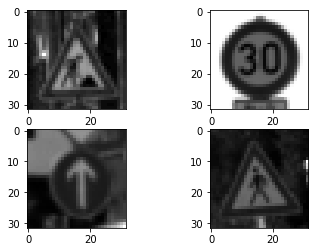

Done preprocessing.


In [14]:
### Preprocess the data here. 
from sklearn.utils import shuffle
#from skimage import exposure
#from skimage.color import rgb2gray
from datetime import datetime

# training data
X_train = np.zeros((n_train, X_train0.shape[1], X_train0.shape[2], 1), np.int)

# validation data
X_valid = np.zeros((n_validation, X_valid0.shape[1], X_valid0.shape[2], 1), np.int)

# grayscale luminosity
#lum = np.ndarray((3,), np.float, np.array([0.210, 0.720, 0.070]))
lum = np.ndarray((3,), np.float, np.array([0.299, 0.587, 0.114]))

y_train = y_train0
y_valid = y_valid0

for i in range(n_train):
    # grayscale with CV2
    #X_train[i,:,:,:] = cv2.cvtColor(X_train[i,:,:,:], cv2.COLOR_RGB2GRAY)
    # grayscale with luminosity
    # 0.21 R + 0.72 G + 0.07 B.
    #X_train[i,:,:,0] = (X_train1[i,:,:,0]*0.21 + X_train1[i,:,:,1]*0.72 + X_train1[i,:,:,2]*0.07).astype(int)
    # also suggested in CarND online foruns
    #X_train[i,:,:,0] = np.dot(X_train1[i,:,:,:], lum).astype(int)
    #p2, p98 = np.percentile(X_train1[i,:,:,:], (2, 98))
    #X_train1[i,:,:,:] = exposure.rescale_intensity(X_train1[i,:,:,:], in_range=(p2, p98))
    #pass
    #X_train[i,:,:,0] = np.dot(X_train1[i,:,:,:]
    #X_train[i,:,:,0] = rgb2gray(X_train1[i,:,:,:])
    
    # grayscale
    X_train[i,:,:,0] = np.dot(X_train0[i,:,:,:], lum)
    

for i in range(n_validation):
    X_valid[i,:,:,0] = np.dot(X_valid0[i,:,:,:], lum).astype(int)

# normalized after grayscale and save computing costs
X_train = (X_train/255.0)-0.5
X_valid = (X_valid/255.0)-0.5

# check data
print("max min ",np.amin(X_train), np.amax(X_train))

fig, axs = plt.subplots(nrows=2, ncols=2)
axs[0, 0].imshow(X_train[im1,:,:,0], cmap=plt.cm.gray)
axs[0, 1].imshow(X_train[im2,:,:,0], cmap=plt.cm.gray)
axs[1, 0].imshow(X_train[im3,:,:,0], cmap=plt.cm.gray)
axs[1, 1].imshow(X_train[im4,:,:,0], cmap=plt.cm.gray)

print("Normalized grayscaled images.")
plt.show()

print("Done preprocessing.")

### Model Architecture

The python function which creates the logitis was coded with a factory pattern, a form of closure. This makes it reusable with different number of output classes.

In [4]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from tensorflow.python.client import device_lib

import platform

def factory(n_classes, mu = 0, sigma = 0.1):
    
    def LeNet(x):    

        # W=32, F=5, P=0, S=1
        # out = 1 + [W-F+2P]/S  => 1 + (32-5+0)/1 = 28
        # Input = 32x32x1. Output = 28x28x6.
        # number of filters is arbitrary
        # https://discussions.udacity.com/t/define-input-depth-output-depth-f/238575/14
        # 
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 16), mean = mu, stddev = sigma))
        conv1_b = tf.Variable(tf.zeros(16))
        conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

        # Activation.
        conv1 = tf.nn.relu(conv1)

        # out = 1 + [W-F+2P]/S  => 1+(28-2+0)/2 = 14
        # Pooling. Input = 28x28x16, Output = 14x14x16.
        conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

        # out = 1 + [W-F+2P]/S  => 1+(14-5+0)/1 = 10
        # Layer 2: Convolutional. Input = 14x14x16, Output = 10x10x32.
        conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = mu, stddev = sigma))
        conv2_b = tf.Variable(tf.zeros(32))
        conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

        # Activation.
        conv2 = tf.nn.relu(conv2)

        # out = 1 + [W-F+2P]/S  => 1+(10-2+0)/2 = 5
        # Pooling. Input = 10x10x16, Output = 5x5x32.
        conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

        # Flatten. Input = 5x5x32. Output = 800.
        fc0   = flatten(conv2)

        # out = 1 + [W-F+2P]/S  => 
        # Fully Connected. Input = 800. Output = 400.
        fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 400), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(400))
        fc1   = tf.matmul(fc0, fc1_W) + fc1_b

        # Activation.
        fc1    = tf.nn.relu(fc1)
        
        # connected layer
        fc2_W = tf.Variable(tf.truncated_normal(shape=(400, 129), mean = mu, stddev = sigma))
        fc2_b = tf.Variable(tf.zeros(129))
        fc2    = tf.matmul(fc1, fc2_W) + fc2_b
        
        fc2    = tf.nn.relu(fc2)

        # Fully Connected. Input = 129. Output = 86.
        fc3_W  = tf.Variable(tf.truncated_normal(shape=(129, 86), mean = mu, stddev = sigma))
        fc3_b  = tf.Variable(tf.zeros(86))
        fc3    = tf.matmul(fc2, fc3_W) + fc3_b

        # Activation.
        fc3    = tf.nn.relu(fc3)

        # Input = 86 Output = n_classes.
        fc4_W  = tf.Variable(tf.truncated_normal(shape=(86, n_classes), mean = mu, stddev = sigma))
        fc4_b  = tf.Variable(tf.zeros(n_classes))
        
        # final
        logits = tf.matmul(fc3, fc4_W) + fc4_b

        return logits
    return LeNet

### Train, Validate and Test the Model

Input data was already split into training, validation and testing. This separation helps to prevent overfiting.

Running the model on AWS enables computations on GPU. For 50 epochs it takes about 3 minutes.

In [5]:

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y})
        total_loss += (loss*len(batch_x))
        total_accuracy += (accuracy * len(batch_x))
    return total_loss/num_examples, total_accuracy / num_examples


In [6]:
### Training pipeline

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

EPOCHS = 50
BATCH_SIZE = 128
#BATCH_SIZE = 256
rate = 0.0005

LeNetFn = factory(n_classes)
logits = LeNetFn(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

print("System:  ")
print(platform.uname())
print("")
devices = [x.name for x in device_lib.list_local_devices() if x.device_type == 'GPU']
print(devices)
print("")

acc_epochs = np.zeros((EPOCHS,), np.float)
loss_fn = np.zeros((EPOCHS,), np.float)

System:  
uname_result(system='Linux', node='ip-172-31-32-67', release='4.4.0-97-generic', version='#120-Ubuntu SMP Tue Sep 19 17:28:18 UTC 2017', machine='x86_64', processor='x86_64')

['/gpu:0']



In [17]:


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print(datetime.now().isoformat(' '), " - Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        loss, validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        acc_epochs[i] = validation_accuracy
        loss_fn[i] = loss
    
    print(datetime.now().isoformat(' '), " - Finished training")
    saver.save(sess, './lenet/lenet')
    print("Model saved")


System:  
uname_result(system='Linux', node='ip-172-31-32-67', release='4.4.0-97-generic', version='#120-Ubuntu SMP Tue Sep 19 17:28:18 UTC 2017', machine='x86_64', processor='x86_64')

['/gpu:0']

2017-10-11 23:21:20.260372  - Training...

EPOCH 1 ...
Validation Accuracy = 0.694

EPOCH 2 ...
Validation Accuracy = 0.849

EPOCH 3 ...
Validation Accuracy = 0.855

EPOCH 4 ...
Validation Accuracy = 0.885

EPOCH 5 ...
Validation Accuracy = 0.878

EPOCH 6 ...
Validation Accuracy = 0.907

EPOCH 7 ...
Validation Accuracy = 0.915

EPOCH 8 ...
Validation Accuracy = 0.920

EPOCH 9 ...
Validation Accuracy = 0.923

EPOCH 10 ...
Validation Accuracy = 0.925

EPOCH 11 ...
Validation Accuracy = 0.909

EPOCH 12 ...
Validation Accuracy = 0.909

EPOCH 13 ...
Validation Accuracy = 0.926

EPOCH 14 ...
Validation Accuracy = 0.922

EPOCH 15 ...
Validation Accuracy = 0.919

EPOCH 16 ...
Validation Accuracy = 0.922

EPOCH 17 ...
Validation Accuracy = 0.929

EPOCH 18 ...
Validation Accuracy = 0.926

EPOCH 19 ...

Average accuracy:  0.921641723207  highest acc:  0.951700680083


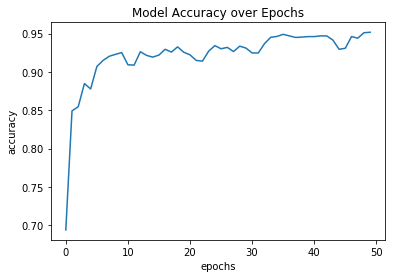

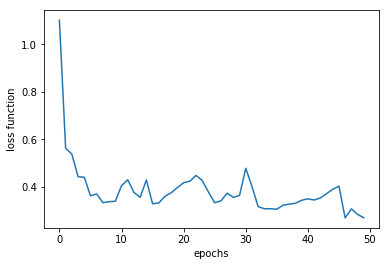

In [18]:
model_r_max = np.max(acc_epochs)
print("Average accuracy: ", np.mean(acc_epochs), " highest acc: ", model_r_max)
plt.figure()
plt.plot(acc_epochs)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Model Accuracy over Epochs")
plt.show()
plt.savefig("./output/evolution_1FD32_L5_E"+str(EPOCHS)+"_B"+str(BATCH_SIZE)+"_R"+str(rate)+"_A94.png")

plt.figure()
plt.plot(loss_fn)
plt.xlabel("epochs")
plt.ylabel("loss function")
plt.show()
plt.savefig("./output/loss_1FD32_L5_E"+str(EPOCHS)+"_B"+str(BATCH_SIZE)+"_R"+str(rate)+"_A94.png")



# Evaluate

After training and validating, its time to test the model with "new" data. This data set was provided in a separated file, so the model was not exposed to it yet.

In [28]:
n_test = X_test0.shape[0]
X_test = np.zeros((n_test, X_test0.shape[1], X_test0.shape[2], 1), np.int)

for i in range(n_test):
    X_test[i,:,:,0] = np.dot(X_test0[i,:,:,:], lum).astype(int)

# normalized after grayscale and save computing costs
X_test = (X_test/255.0)-0.5

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./lenet'))

    _, test_accuracy = evaluate(X_test, y_test0)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet/lenet
Test Accuracy = 0.929


---

## Step 3: Test a Model on New Images

Ater testing the model, let's try its accuracy on 5 new images found on internet.

### Load and Output the Images

In [1]:
import matplotlib.image as mpimg

xtest20 = np.ndarray((5, 32, 32, 3), np.float)
xtest21 = np.ndarray((5, 32, 32, 1), np.float)
#xtest20[0, :, :, :] = mpimg.imread('./new-data/ni_01_14.png')
#xtest20[1, :, :, :] = mpimg.imread('./new-data/ni_02_15.png')
#xtest20[2, :, :, :] = mpimg.imread('./new-data/ni_03_27.png')
#xtest20[3, :, :, :] = mpimg.imread('./new-data/ni_04_30.png')
#xtest20[4, :, :, :] = mpimg.imread('./new-data/ni_05_40.png')

xtest20[0, :, :, :] = mpimg.imread('./new-data/ni_01_14.jpg')
xtest20[1, :, :, :] = mpimg.imread('./new-data/ni_02_15.jpg')
xtest20[2, :, :, :] = mpimg.imread('./new-data/ni_03_27.jpg')
xtest20[3, :, :, :] = mpimg.imread('./new-data/ni_04_30.jpg')
xtest20[4, :, :, :] = mpimg.imread('./new-data/ni_05_40.jpg')

ylabels = np.ndarray((5,), np.int, np.array([14,15,27,30,40]))
lum = np.ndarray((3,), np.float, np.array([0.299, 0.587, 0.114]))
for i in range(5):
    xtest21[i,:,:,0] = np.dot(xtest20[i,:,:,:], lum)
    
# normalized after grayscale and save computing costs
xtest21 = (xtest21/255.0)-0.5

fig, axs = plt.subplots(nrows=3, ncols=2)
axs[0, 0].imshow(xtest20[0,:,:,:])
axs[0, 1].imshow(xtest20[1,:,:,:])
axs[1, 0].imshow(xtest20[2,:,:,:])
axs[1, 1].imshow(xtest20[3,:,:,:])
axs[2, 0].imshow(xtest20[4,:,:,:])

plt.show()

fig, axs = plt.subplots(nrows=3, ncols=2)
axs[0, 0].imshow(xtest21[0,:,:,0], cmap=plt.cm.gray)
axs[0, 1].imshow(xtest21[1,:,:,0], cmap=plt.cm.gray)
axs[1, 0].imshow(xtest21[2,:,:,0], cmap=plt.cm.gray)
axs[1, 1].imshow(xtest21[3,:,:,0], cmap=plt.cm.gray)
axs[2, 0].imshow(xtest21[4,:,:,0], cmap=plt.cm.gray)

plt.show()



NameError: name 'np' is not defined

### Predict the Sign Type for Each Image

In [9]:

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./lenet'))
    r1 = sess.run(logits, feed_dict={x: xtest21})
    print(r1)
    print(r1.shape)
    
    r2 = sess.run(tf.nn.softmax(logits), feed_dict={x: xtest21}))
    print(r2)
    

INFO:tensorflow:Restoring parameters from ./lenet/lenet
[[ -1.16359282e+00   1.30636110e+01  -7.29241800e+00  -5.69495058e+00
   -8.16824532e+00  -1.43397522e+01  -2.05713539e+01  -2.31926956e+01
   -1.75811291e+01  -1.23388786e+01  -2.57166996e+01  -9.89261341e+00
   -4.13492537e+00  -8.18076706e+00   1.03350801e+01  -1.54562178e+01
   -3.31067314e+01   2.41243675e-01  -2.69493256e+01  -2.98070202e+01
   -2.24623661e+01  -3.02966156e+01  -2.07867889e+01  -2.06487865e+01
   -3.02993927e+01  -1.86863976e+01  -9.10157108e+00  -5.13577385e+01
   -1.74476395e+01  -5.86206627e+00  -2.40944519e+01  -2.80771389e+01
   -1.58900146e+01  -7.60991049e+00   1.82930005e+00  -6.10108471e+00
   -1.64262810e+01  -1.64108200e+01  -8.56265545e+00  -2.63730774e+01
   -6.90037489e+00  -2.21662788e+01  -3.74552841e+01]
 [ -5.15312004e+01  -2.11327934e+01  -7.19031382e+00   4.81900167e+00
   -2.76034012e+01   6.73922058e-03  -4.55112762e+01  -2.13139534e+01
   -5.07977867e+00   8.66491616e-01  -2.27295666e+

### Analyze Performance

In [10]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./lenet'))
    _, test_2_accuracy = evaluate(xtest21, ylabels)
    print("Test 2 Accuracy = {:.3f}".format(test_2_accuracy))
    

INFO:tensorflow:Restoring parameters from ./lenet/lenet
Test 2 Accuracy = 0.400


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of these 5 new images, show the 5 highest probabilities.

In [11]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./lenet'))

    #
    # tf.nn.softmax(logits)
    prob = sess.run(tf.nn.top_k(logits, k=5), feed_dict={x: xtest21})
    print(prob)

INFO:tensorflow:Restoring parameters from ./lenet/lenet
TopKV2(values=array([[ 13.06361103,  10.33508015,   1.82930005,   0.24124368,
         -1.16359282],
       [ 21.49980927,  20.45731926,  15.31294727,  10.7414093 ,
          4.81900167],
       [ 34.90397644,  23.21795273,  11.19343662,  10.67479324,
          5.32180262],
       [ 21.72291183,  19.14329338,  10.74132729,   5.52494955,
          4.84987926],
       [ 20.78737831,  15.86055088,  10.09275532,   7.00243235,   5.3946476 ]], dtype=float32), indices=array([[ 1, 14, 34, 17,  0],
       [15, 12, 13, 35,  3],
       [40,  1, 18, 12, 31],
       [30, 23, 22, 19, 26],
       [ 9, 35, 13, 34, 17]], dtype=int32))
